# 📘 Web Scraping: Books to Scrape
This project scrapes book data from http://books.toscrape.com using Python and BeautifulSoup.

## ✅ Objective
- Extract book titles, prices, availability, and ratings.
- Save the data into a structured CSV file.

In [1]:
!pip install requests beautifulsoup4 pandas


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [3]:
url = "http://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [4]:
books = []

book_containers = soup.find_all('article', class_='product_pod')

for book in book_containers:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text.strip()
    availability = book.find('p', class_='instock availability').text.strip()
    rating = book.p['class'][1]  # Example: "star-rating Three"

    books.append({
        'Title': title,
        'Price': price,
        'Availability': availability,
        'Rating': rating
    })


In [5]:
df = pd.DataFrame(books)
df.head()


,Title,Price,Availability,Rating
0,A Light in the Attic,£51.77,In stock,Three
1,Tipping the Velvet,£53.74,In stock,One
2,Soumission,£50.10,In stock,One
3,Sharp Objects,£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,£54.23,In stock,Five


In [6]:
df.to_csv("books.csv", index=False)
print("✅ Data saved to books.csv")


✅ Data saved to books.csv


In [7]:
!pip install matplotlib seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set seaborn theme
sns.set(style="whitegrid")


# Bar Chart of Book Ratings

C:\Users\my computers\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


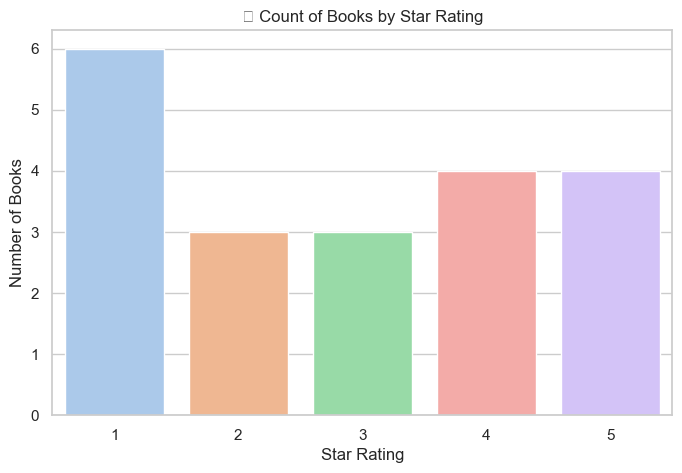

In [9]:
# Convert textual ratings to numbers
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['Rating_Num'] = df['Rating'].map(rating_map)

# Plot count of each rating
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating_Num', data=df, palette='pastel')
plt.title('📚 Count of Books by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Books')
plt.show()


# Price vs Rating plot

C:\Users\my computers\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


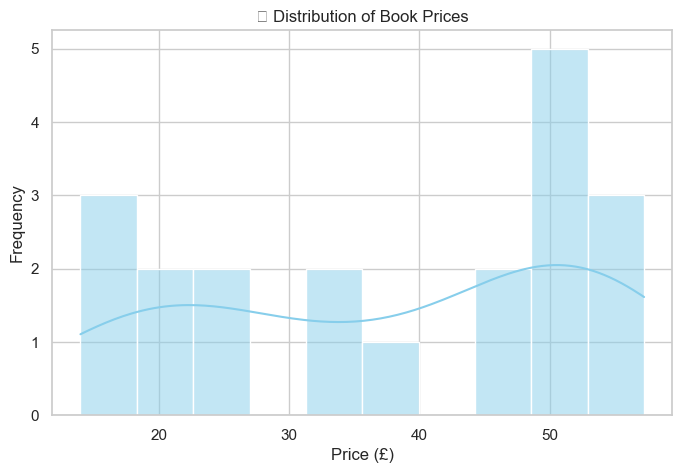

In [10]:

df['Price_Num'] = df['Price'].str.replace('£', '').astype(float)

# Plot histogram of prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_Num'], bins=10, kde=True, color='skyblue')
plt.title('💵 Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()


C:\Users\my computers\AppData\Local\Temp\ipykernel_30468\3941685813.py:17: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
C:\Users\my computers\AppData\Local\Temp\ipykernel_30468\3941685813.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\my computers\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\my computers\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


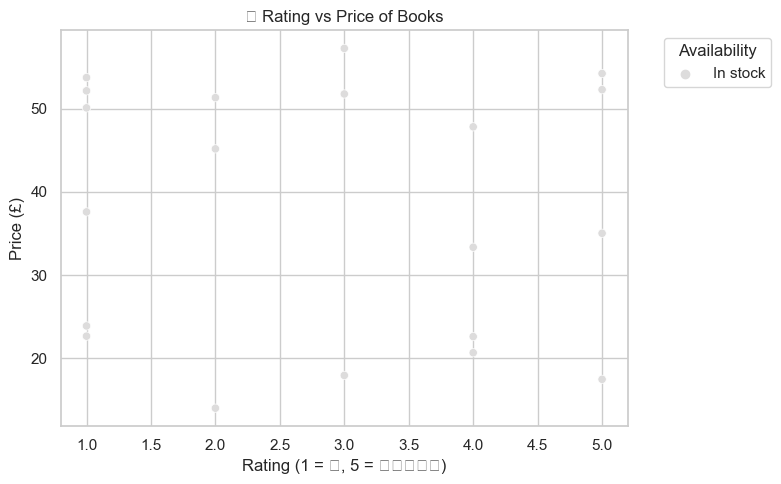

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric values exist
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Rating_Num'] = df['Rating'].map(rating_map)
df['Price_Num'] = df['Price'].str.replace('£', '').astype(float)

# Create the plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rating_Num', y='Price_Num', hue='Availability', palette='coolwarm')

plt.title('📊 Rating vs Price of Books')
plt.xlabel('Rating (1 = ⭐, 5 = ⭐⭐⭐⭐⭐)')
plt.ylabel('Price (£)')
plt.legend(title='Availability', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
